In [1]:
# -- imports --
import anndata as ad
import numpy as np
import scanpy as sc

from scipy import sparse

from signals_in_the_noise.preprocessing.gse161529 import GSE161529

In [2]:
# -- dataset --
gse = GSE161529()

# -- constants --
random_kwargs = {'use_rep': 'X_pca', 'random_state': 43}

2025-07-13 18:34:55,445 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-07-13 18:34:55,509 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-07-13 18:34:55,583 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-07-13 18:34:55,621 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-07-13 18:34:55,708 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to hig

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
C:\Users\silly\GitHub\signals-in-the-noise\src\signals_in_the_noise\preprocessing\gse161529.py:319: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=resolution, random_state=self.get_random_kwarg('random_state'))
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical


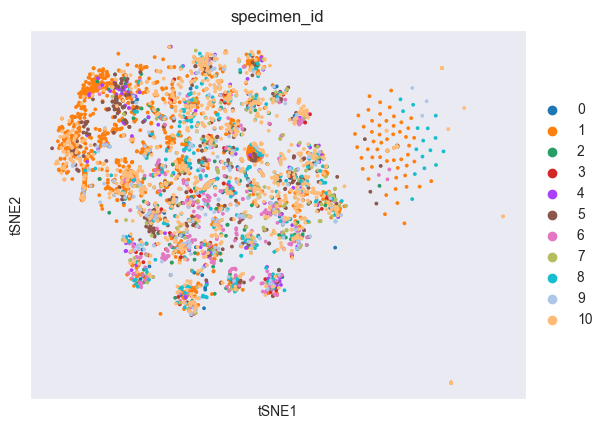

In [3]:
all_real, all_noise = gse.get_combined_epithilial_dataset()
gse.visualize_tsne(all_noise, color=['specimen_id'])

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


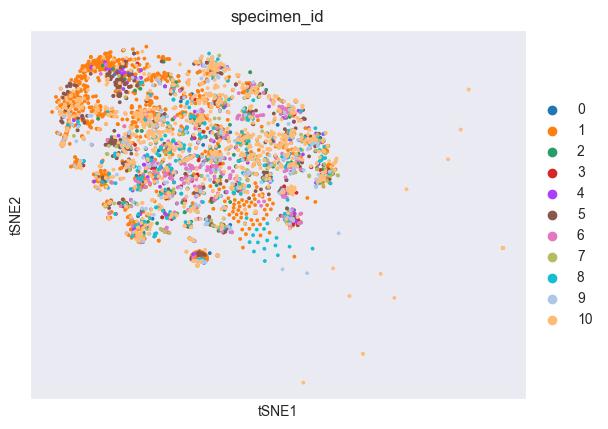

In [6]:
gse.visualize_tsne(all_noise, color=['specimen_id'])

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-13 20:48:33,940 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-13 20:48:33,942 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-13 20:48:50,110 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`


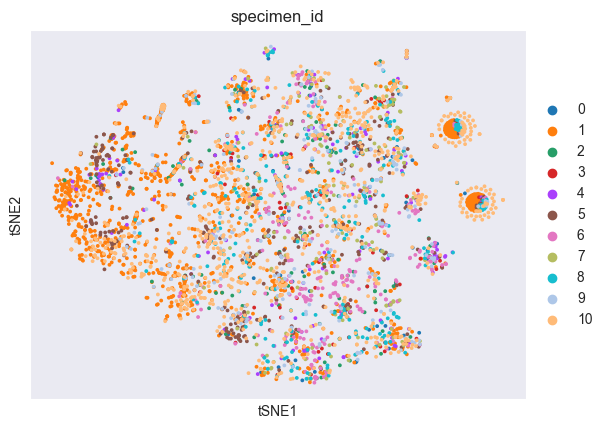

In [76]:
from openTSNE import TSNE

def figure_1_tsne(adata_all, color, use_raw=False):
    sc.pp.scale(adata_all)
    sc.pp.pca(adata_all, n_comps=50, random_state=random_kwargs['random_state'])
    sc.pp.neighbors(adata_all, n_pcs=50, **random_kwargs)
    # use of leiden and resolution specified in caption for Figure 1E
    sc.tl.leiden(adata_all, resolution=0.015, random_state=random_kwargs['random_state'])
    # sc.tl.tsne(adata_all, n_jobs=1, **random_kwargs)
    tsne = TSNE(
        initialization='pca',
        n_jobs=1,
        random_state=random_kwargs['random_state'],
        n_iter=1000,
        learning_rate=200,
    )
    # -- this one made them more similar, but still shifts the things
    adata_all.obsm['X_tsne'] = tsne.fit(np.round(adata_all.obsm["X_pca"], decimals=8))
    # adata_all.obsm['X_tsne'] = tsne.fit(adata_all.obsm["X_pca"])
    sc.pl.tsne(adata_all, color=color, use_raw=False)

figure_1_tsne(all_noise, color=['specimen_id'])

In [77]:
# sc.pp.scale(all_noise)
# sc.pp.pca(all_noise, n_comps=50, random_state=random_kwargs['random_state'])
# np.isnan(all_noise.obsm['X_pca']).sum()

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-13 20:50:08,988 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-13 20:50:08,990 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-13 20:50:25,853 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`


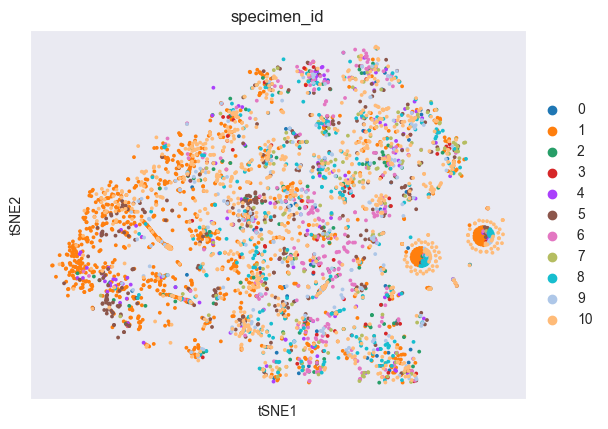

In [78]:
figure_1_tsne(all_noise, color=['specimen_id'])

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-13 20:51:44,679 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-13 20:51:44,681 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-13 20:52:03,302 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`


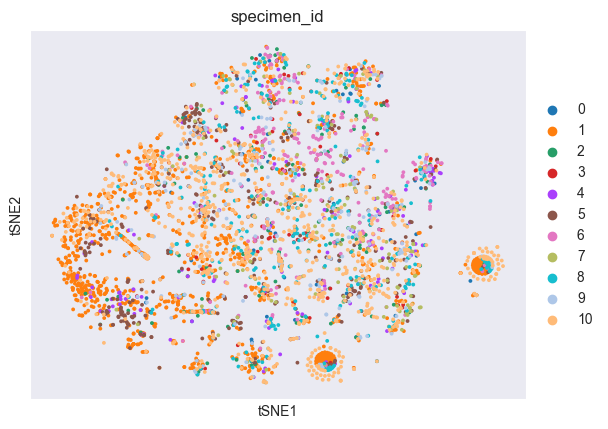

In [79]:
figure_1_tsne(all_noise, color=['specimen_id'])